In [1]:
import pandas as pd
import numpy as np
import pickle
#np.float = float  
#np.bool = bool
#np.int = int
import time
import math
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import re
import csv

from sentence_transformers import SentenceTransformer

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report, confusion_matrix

pd.set_option('display.max_columns', 50)

In [2]:
import os
# change this directory to a folder with all the files you want in it 
# directory_path = '/home/seh6fy/git/dspg22ari2/BERT_Analysis/GAT'
#directory_path = '/home/seh6fy/git/dspg22ari2/BERT_Analysis/Temporary'
directory_path = '/home/jhj5dh/ARI/dspg22ari2/BERT_Analysis/GAT'
# list of file names in the directory
list_of_files = os.listdir(directory_path)

# initialize an empty dataframe to store the text documents
df = pd.DataFrame(columns=['text'])

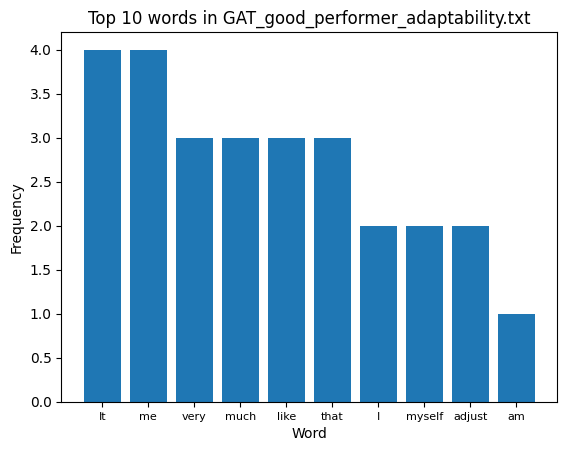

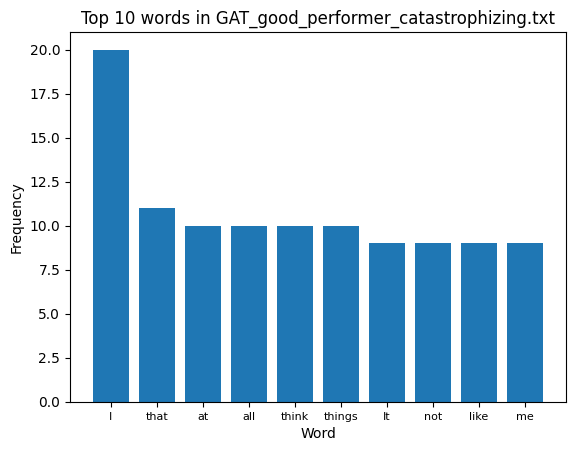

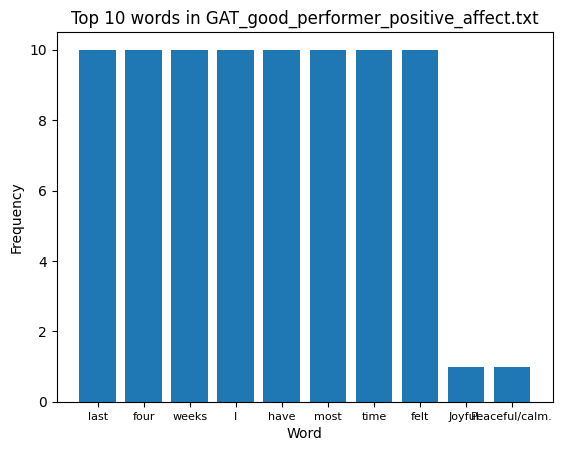

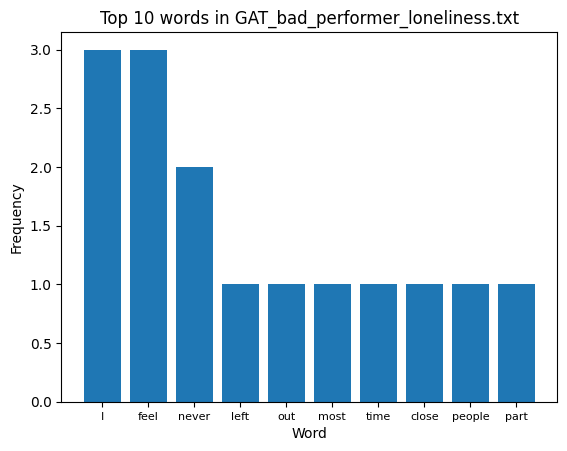

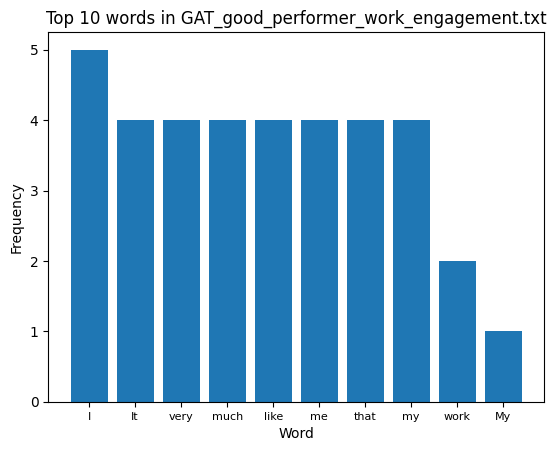

/home/jhj5dh/.conda/envs/bert/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 61623 (\uf0b7) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


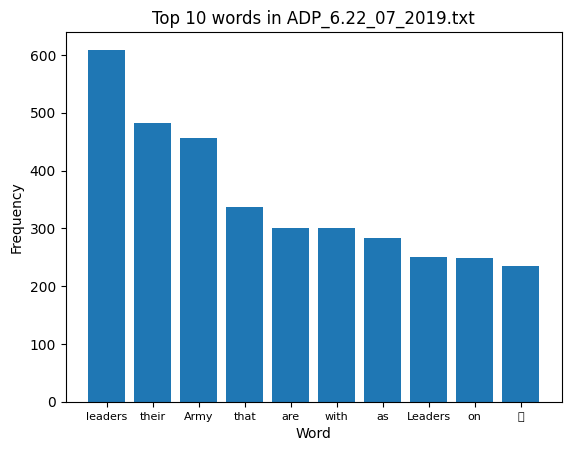

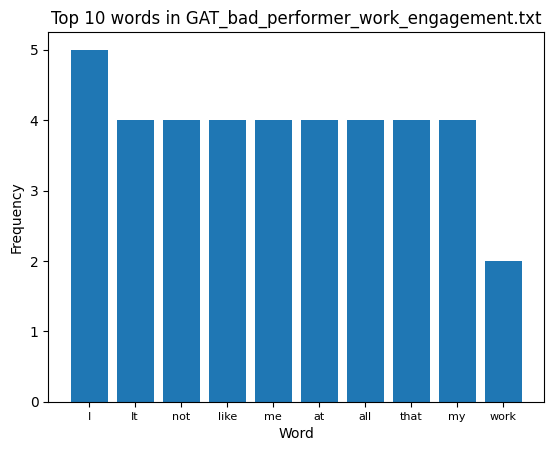

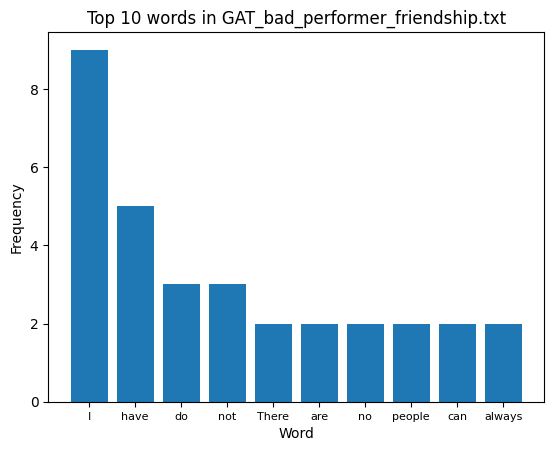

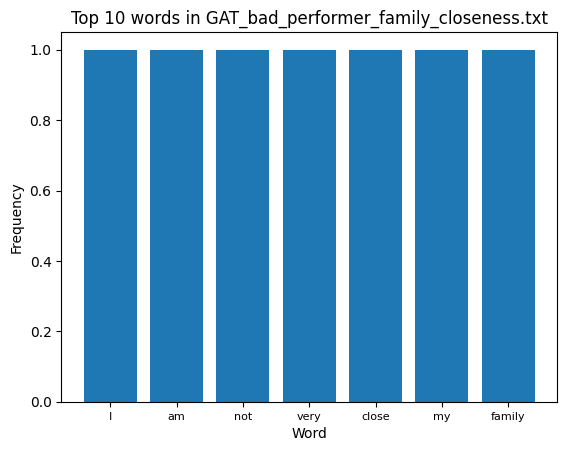

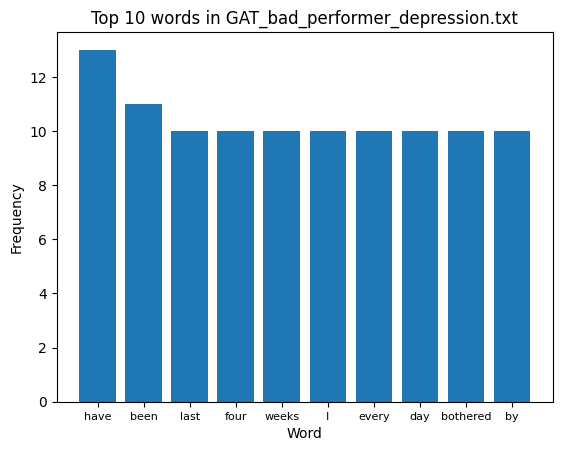

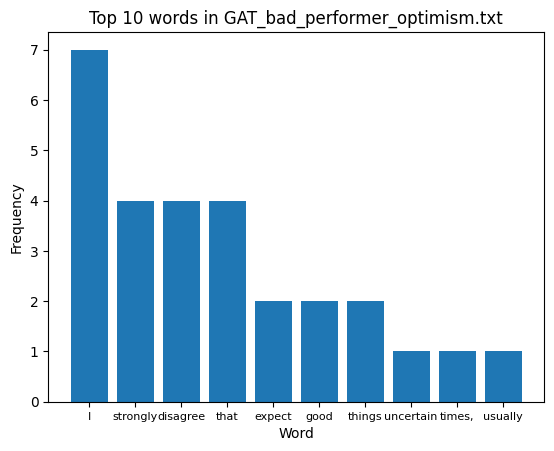

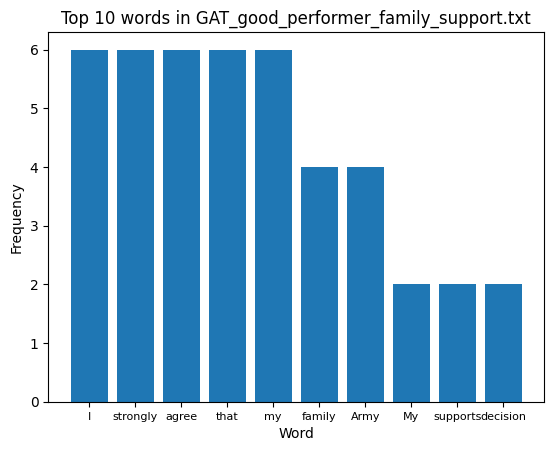

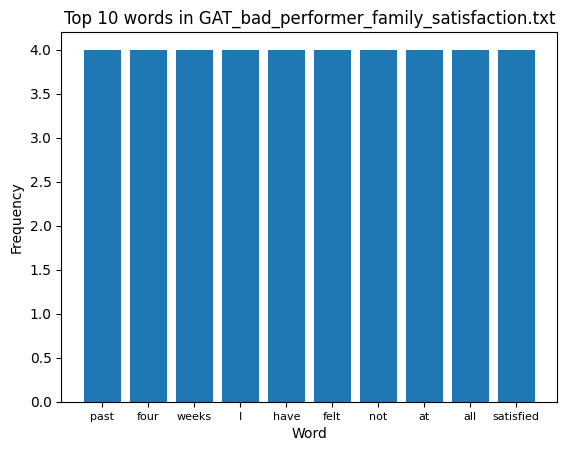

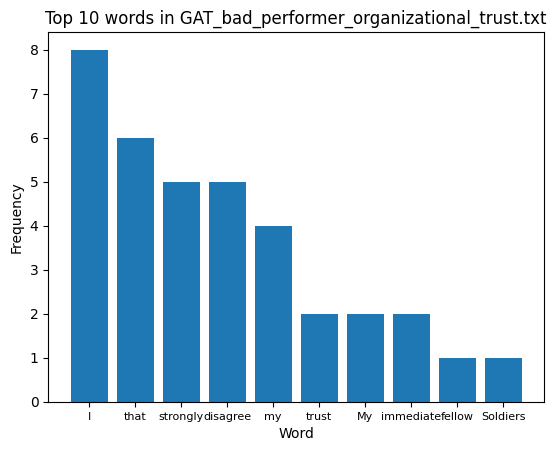

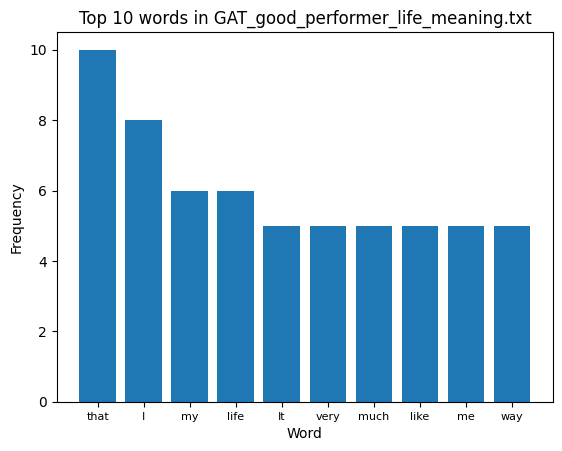

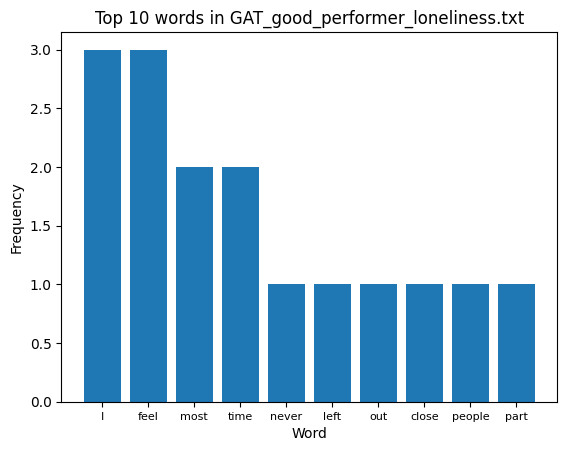

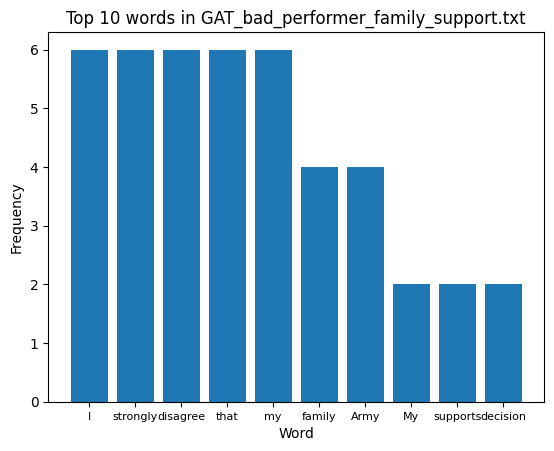

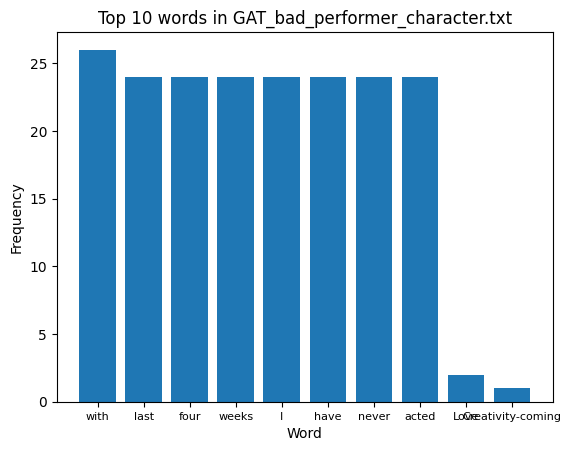

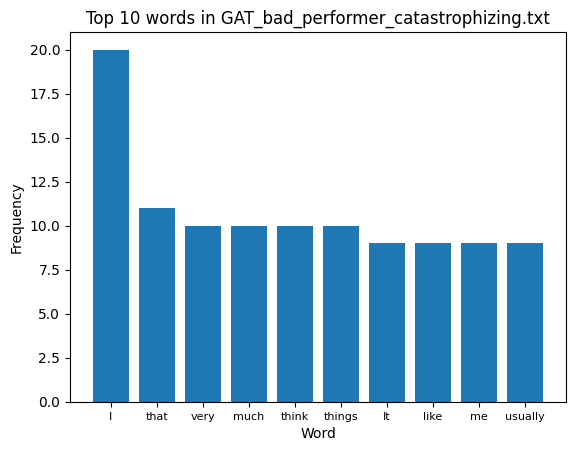

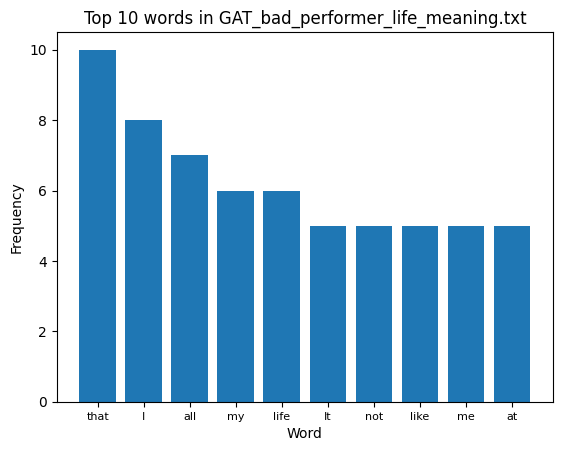

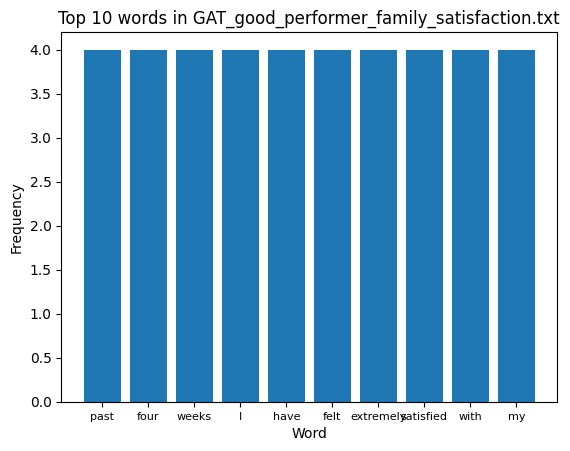

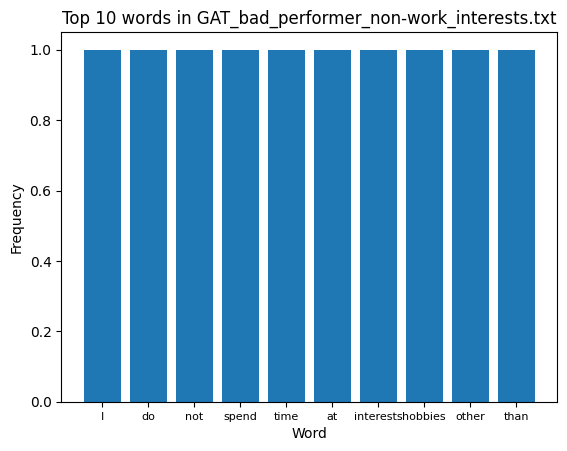

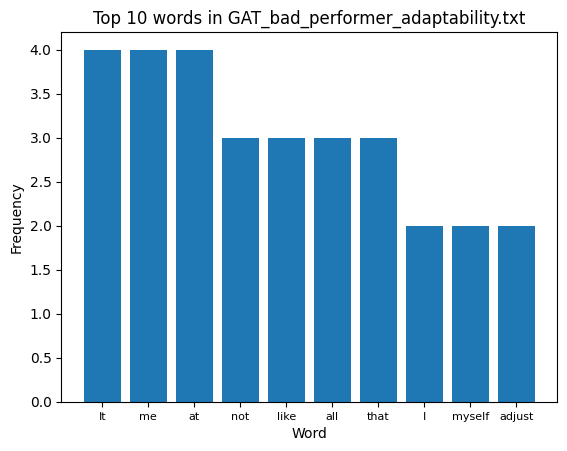

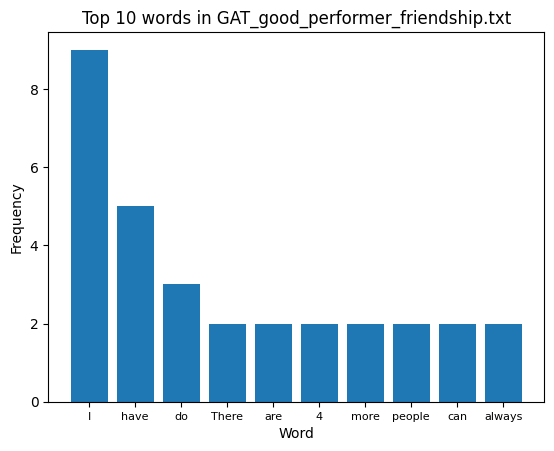

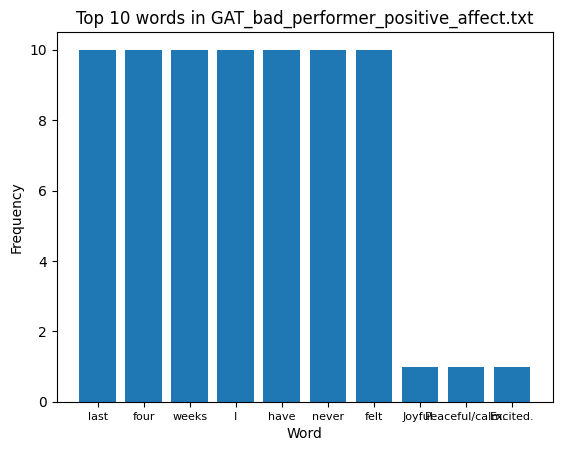

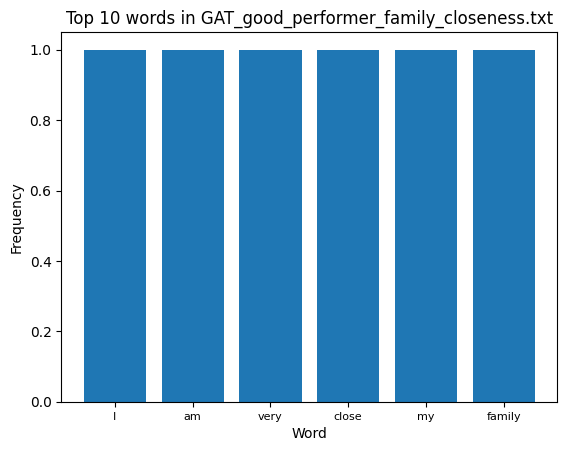

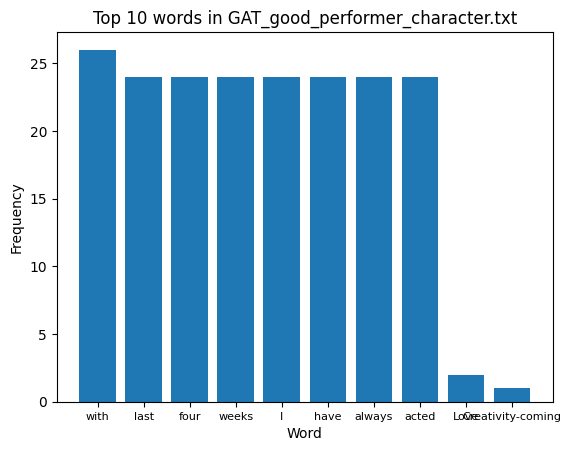

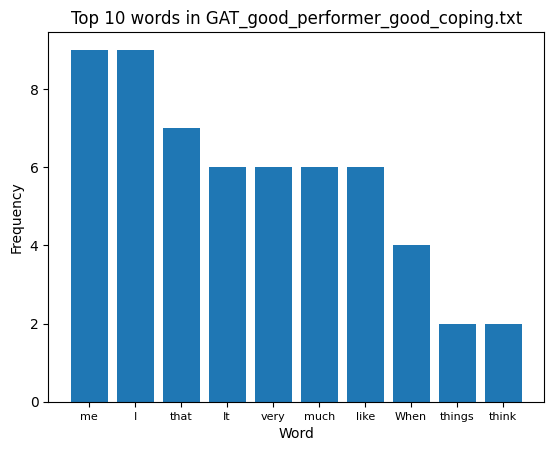

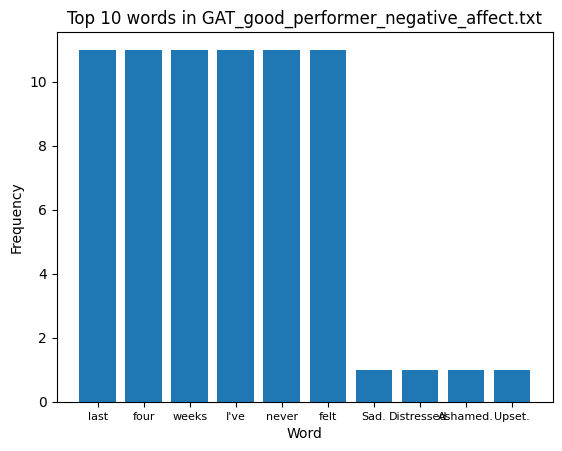

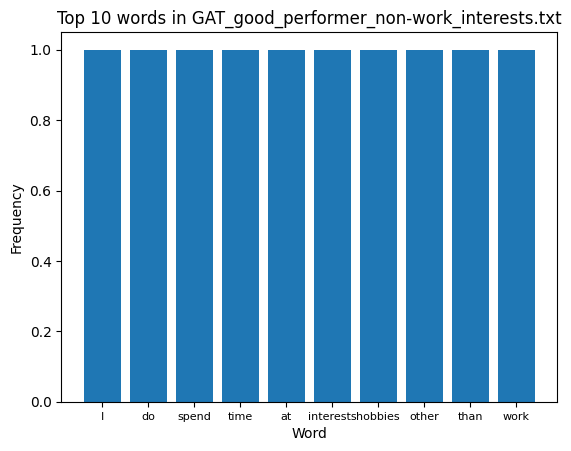

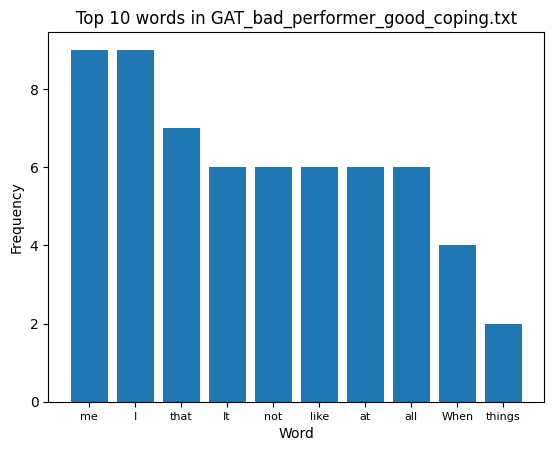

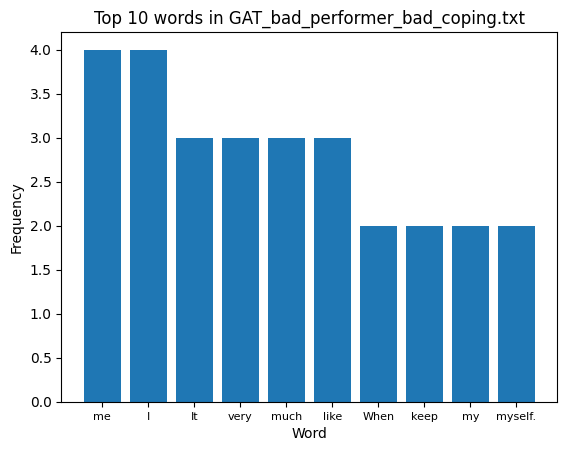

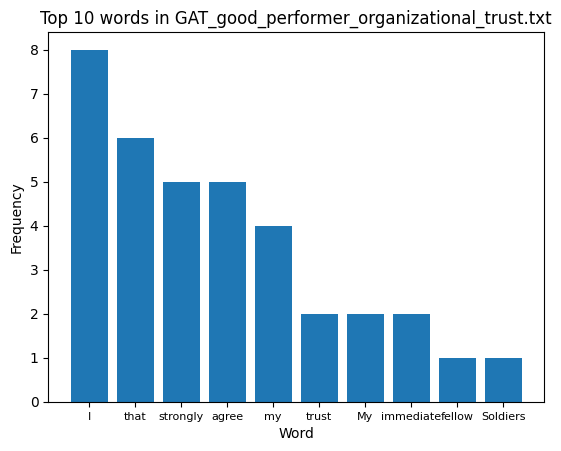

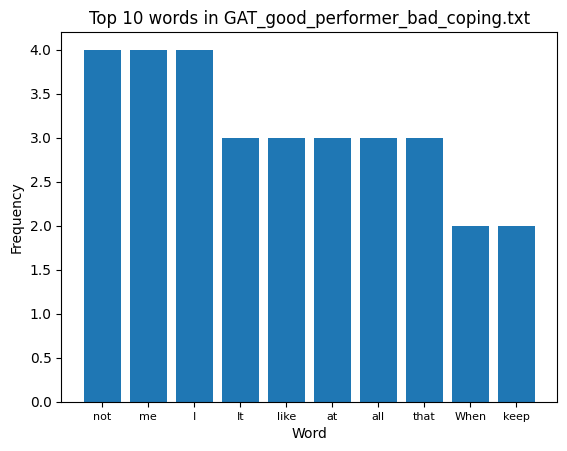

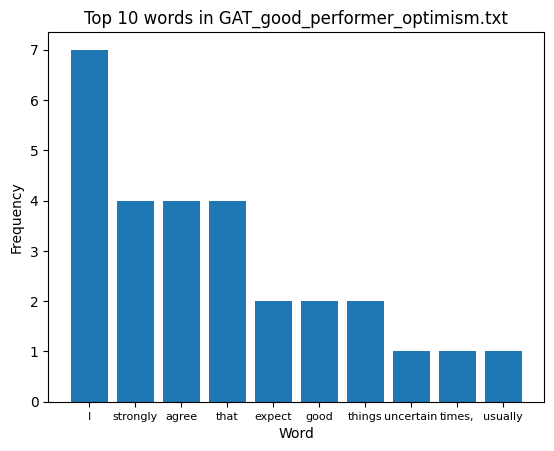

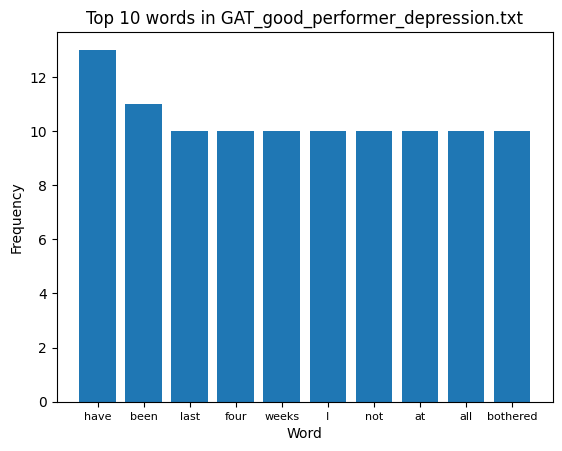

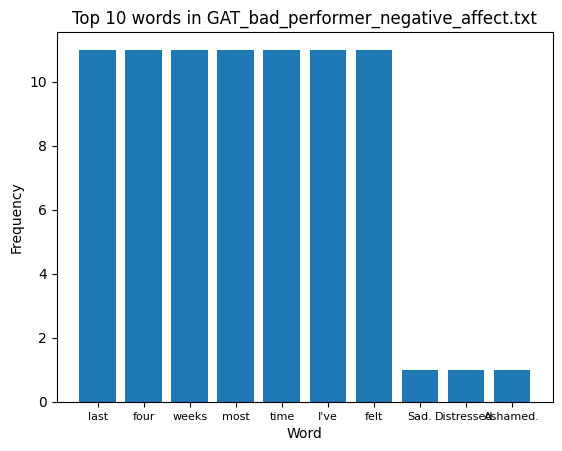

In [3]:
import os
import glob
# displays the number of words in each document 
# update the path to be a folder with the files you want to analyze in it 

import os
import glob
import matplotlib.pyplot as plt
from collections import Counter

#directory = "/home/zax3kt/github/dspg22ari2/BERT_Analysis/GAT"  # replace with the directory path
import os
import glob
import matplotlib.pyplot as plt
from collections import Counter

top_n = 10  # number of top words to display

def plot_top_words(file_path):
    # read the contents of the file
    with open(file_path, "r") as f:
        contents = f.read()

    # split the contents into words
    words = contents.split()
     #remove stop words
    stopwords = ['the', 'and', 'to', 'of', 'is', 'a', 'in', '.', 'or', 'for']
    words = [word for word in contents.split() if word.lower() not in stopwords]


    # initialize a Counter object to keep track of word frequencies
    word_counts = Counter(words)

    # get the top n most common words
    top_words = word_counts.most_common(top_n)

    # extract the words and frequencies as separate lists
    words, frequencies = zip(*top_words)

    # create a bar graph of the top words
    plt.bar(words, frequencies)
    plt.title("Top {} words in {}".format(top_n, os.path.basename(file_path)))
    plt.xlabel("Word")
    plt.ylabel("Frequency")
    plt.xticks(fontsize=8)
    plt.show()

# loop through all files in the directory and plot the top words for each file
for file_path in glob.glob(os.path.join(directory_path, "*")):
    plot_top_words(file_path)

          


In [4]:
import os
import glob

#folder_path = "/home/seh6fy/git/dspg22ari2/BERT_Analysis/FM_Docs"

# Get a list of all the files in the folder
file_list = glob.glob(os.path.join(directory_path, '*.txt'))

# Iterate through each file and count the words
for file_path in file_list:
    with open(file_path, 'r') as file:
        words = file.read().split()
        word_count = len(words)
        
        # Create an empty dictionary to store word counts
        word_counts = {}
        
        # Iterate through each word and update the dictionary
        for word in words:
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1
                
        # Print the word counts for the file
        #print(f"{file_path}: {word_count} words")
        #for word, count in word_counts.items():
            #print(f"    {word}: {count}")


In [5]:
import os
for filename in list_of_files:
    file_path = os.path.join(directory_path, filename)
    # check if the path is a file
    if os.path.isfile(file_path):
        # read the contents of the file and append as a new row to the dataframe
        text = pd.read_csv(file_path, on_bad_lines='skip', encoding='utf-8', quoting=csv.QUOTE_NONE, lineterminator='.', header=None)[0].str.cat().strip()
        #print(text)
        temp = {'text': text, 'index':[0]}
        temp_df=pd.DataFrame.from_dict(temp)
        #temp_df.head()
        df=pd.concat([df, temp_df], ignore_index=True)
        #df = df.concat({'text': text}, ignore_index=True)

In [6]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :",duplicate)

Duplicate Rows : Empty DataFrame
Columns: [text, index]
Index: []


In [7]:
# this line is taking out the new lines so it doesn't display them all as seperate documents
df = df.replace(r'\n',' ', regex=True)
# https://medium.com/@armandj.olivares/using-bert-for-classifying-documents-with-long-texts-5c3e7b04573d

In [8]:
df.head()

,text,index
0,It is very much like me that I am good at chan...,0.0
1,It is not like me at all that I usually think ...,0.0
2,In the last four weeks I have most of the time...,0.0
3,I feel left out most of the time I never feel ...,0.0
4,It is very much like me that My work is one of...,0.0


In [9]:
df = df.replace ('', ' ', regex = True)

In [10]:

import unicodedata
df['text'] = df['text'].apply(lambda x: ''.join([' ' if not unicodedata.normalize('NFKD', char).encode('ASCII', 'ignore') else char for char in x]))


In [11]:
df.shape

(37, 2)

In [12]:
import pandas as pd
import numpy as np
np.object = object
np.typeDict = np.sctypeDict
#import tensorflow as tf
from transformers import BertModel, BertTokenizer # Load the BERT tokenizer
from transformers import *
# here you could try switching the model from bert-base-cased

# # Load the BERT model
model = AutoModel.from_pretrained("bert-base-cased")
# max_seq_length = 512
model_name = 'bert-base-uncased'
bert_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

2023-07-06 10:10:25.523391: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-06 10:10:25.970257: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 10:10:29.897924: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/jhj5dh/.local/lib/python3.8/site-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transfor

In [13]:
import torch

In [14]:
# could look into different encoding methods
def encode_document(text, max_tokens=5):
    input_ids = tokenizer.encode(text, max_length=max_tokens, truncation=True, add_special_tokens=True,return_tensors='pt')
    outputs = model(input_ids)
    last_hidden_state = outputs.last_hidden_state
    document_embedding = torch.mean(last_hidden_state, axis=1)
    return last_hidden_state.detach().numpy().squeeze()

vectors = df['text'].apply(lambda x: encode_document(str(x)))

d1 = {'vectors':vectors}
df2 = pd.DataFrame(d1)

#output_vectors = pd.DataFrame(vectors.tolist())
output_vectors = pd.DataFrame(x[0] for x in df2.vectors)
# Write the output vectors to a csv file
# change the output vector name every time you change the folder
output_vectors.to_csv('output_vectors_gat.csv', index=False)


In [15]:
len(output_vectors)

37

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc788924d30>
Traceback (most recent call last):
  File "/home/jhj5dh/.conda/envs/bert/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/jhj5dh/.conda/envs/bert/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/jhj5dh/.conda/envs/bert/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/jhj5dh/.conda/envs/bert/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


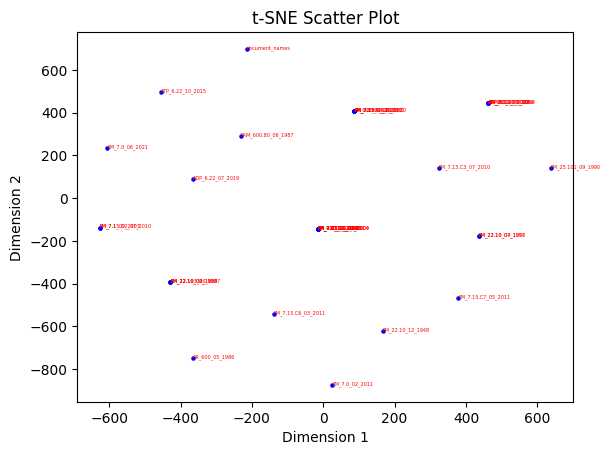

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os

docs_path = '/home/jhj5dh/ARI/dspg22ari2/BERT_Analysis/Docs'
doc_names = []
for filename in os.listdir(docs_path):
    if filename.endswith('.txt'):
        doc_names.append(filename[:-4])
        
# Reduce the dimensionality of the vectors using t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectors_tsne = tsne.fit_transform(output_vectors)

fig, ax = plt.subplots()

for i, vec in enumerate(vectors_tsne):
    ax.scatter(vec[0], vec[1], c='b', marker='o', s=5)
    ax.text(vec[0], vec[1], doc_names[i], color='r', fontsize=3.5)

# Set labels and title
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('t-SNE Scatter Plot')

# Show the plot
plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc78073fee0>
Traceback (most recent call last):
  File "/home/jhj5dh/.conda/envs/bert/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/jhj5dh/.conda/envs/bert/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/jhj5dh/.conda/envs/bert/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/jhj5dh/.conda/envs/bert/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


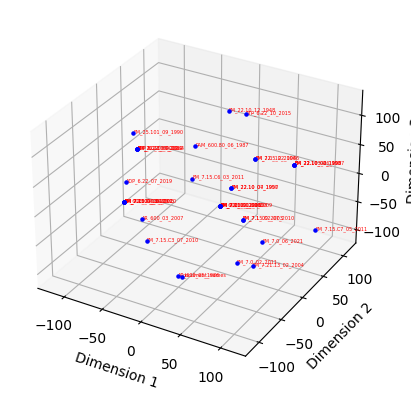

In [21]:
import os
from sklearn.manifold import TSNE
doc_names = []
# change the directory location to match the one above to have the correct document names
for filename in os.listdir(docs_path):
#for filename in os.listdir('/home/seh6fy/git/dspg22ari2/BERT_Analysis/Temporary'):
    if filename.endswith('.txt'):
        doc_names.append(filename[:-4])

tsne = TSNE(n_components=3, random_state=42)
vectors_tsne = tsne.fit_transform(output_vectors)

# Plot the vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, vec in enumerate(vectors_tsne):
    ax.scatter(vec[0], vec[1], vec[2], c='b', marker='o', s=5)
    ax.text(vec[0], vec[1], vec[2], doc_names[i], color='r', fontsize= 3.5)
    
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# Save the plot as a PDF file
# plt.savefig('plot.pdf')
plt.savefig('plot.pdf')
plt.show()




Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc78073fdc0>
Traceback (most recent call last):
  File "/home/jhj5dh/.conda/envs/bert/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/jhj5dh/.conda/envs/bert/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/jhj5dh/.conda/envs/bert/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/jhj5dh/.conda/envs/bert/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


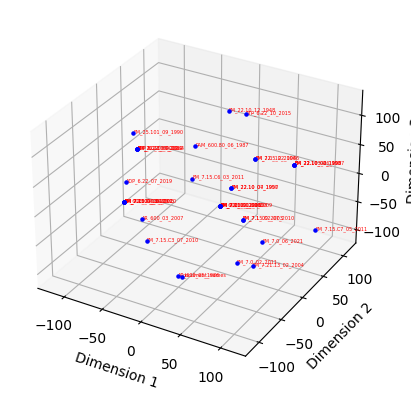

In [22]:
import os
from sklearn.manifold import TSNE

doc_names = []
# change the directory location to match the one above to have the correct document names
for filename in os.listdir(docs_path):
    if filename.endswith('.txt'):
        doc_names.append(filename[:-4])

tsne = TSNE(n_components=3, random_state=42)
vectors_tsne = tsne.fit_transform(output_vectors)

np.savetxt('vectors_tsne.csv', vectors_tsne, delimiter=',')



# Plot the vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, vec in enumerate(vectors_tsne):
    ax.scatter(vec[0], vec[1], vec[2], c='b', marker='o', s=5)
    ax.text(vec[0], vec[1], vec[2], doc_names[i], color='r', fontsize= 3.5)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# Save the plot as a PDF file
# plt.savefig('plot.pdf')
plt.savefig('plot.pdf')
plt.show()


In [23]:
pwd

'/sfs/qumulo/qhome/jhj5dh/ARI/dspg22ari2/BERT_Analysis/Analysis'

In [1]:
output_vectors.shape

NameError: name 'output_vectors' is not defined